In [ ]:
!pip install -q diffusers transformers accelerate invisible-watermark>=0.2.0


In [ ]:
from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid
import torch

In [ ]:
class StableDiffusionXl:
  def __init__(self):
    torch.cuda.empty_cache()
    self.pipeline_text2image = AutoPipelineForText2Image.from_pretrained(
        "stabilityai/stable-diffusion-xl-base-1.0",
        torch_dtype=torch.float16,
        variant="fp16",
        use_safetensors=True
        ).to("cuda")
    self.pipeline_image2image = AutoPipelineForImage2Image.from_pipe(
        self.pipeline_text2image).to("cuda")

  def text2image(self, prompt):
    image = self.pipeline_text2image(prompt=prompt).images[0]
    return image

  def image2imageUrl(self, url, prompt, strength=0.8, guidance_scale=10.5):
    init_image = load_image(url)
    image = self.pipeline_image2image(prompt,
                                      image=init_image,
                                      strength=strength,
                                      guidance_scale=guidance_scale).images[0]
    return make_image_grid([init_image, image], rows=1, cols=2)

In [ ]:
stableDiffusionXl = StableDiffusionXl()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

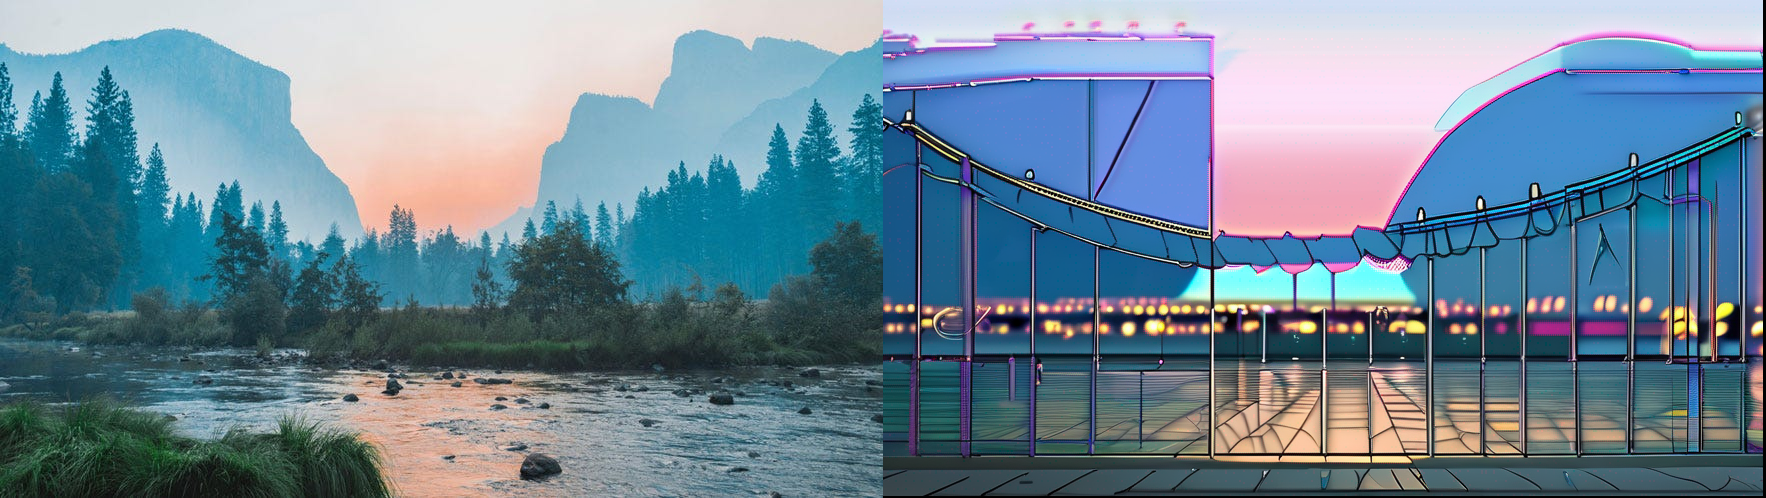

In [ ]:
init_image = load_image("https://www.adorama.com/alc/wp-content/uploads/2018/11/landscape-photography-tips-yosemite-valley-feature.jpg")

image = stableDiffusionXl.image2imageUrl("https://www.adorama.com/alc/wp-content/uploads/2018/11/landscape-photography-tips-yosemite-valley-feature.jpg",
                                      "Make this image anime style"
                                      )
image